In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Import Dataset

In [3]:
df = pd.read_csv(r"C:\Projects\ICT_Assignments\FinalProject\main_project-bank-full.csv")
df_unchanged = df
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
df.shape[0]

45211

In [6]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact      14
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome     10
Target        0
dtype: int64

In [7]:
df.isnull().mean()

age          0.000000
job          0.000000
marital      0.000000
education    0.000000
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.000310
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000221
Target       0.000000
dtype: float64

In [8]:
# Examples of contact.
df['contact'].unique()

array(['unknown', nan, 'cellular', 'telephone'], dtype=object)

In [9]:
df['poutcome'].unique()

array(['unknown', nan, 'failure', 'other', 'success'], dtype=object)

In [10]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [11]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [6]:
df['Target'].unique()

array(['no', 'yes'], dtype=object)

More InSights

In [12]:
# bucket boundaries
buckets = [0, 20, 40, 60, 1000]

# bucket labels
labels = ['0-20', '20-40', '40-60', '>60']

# discretisation
df['Age_buckets_labels'] = pd.cut(
    df['age'], bins=buckets, labels=labels, include_lowest=True)

df['Age_buckets'] = pd.cut(df['age'], bins=buckets, include_lowest=True)
df['loan'] = np.where(df['loan'] =='yes', 1, 0)

df['default'] = df['default'].map( 
                   {'yes':1 ,'no':0}) 
df['housing'] = np.where(df['housing'] =='yes', 1, 0)
df['marital'] = np.where(df['marital'] =='married', 0,np.where(df['marital'] =='single', 1,np.where(df['marital'] =='divorced', 2, -1)))

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets
0,58,management,0,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
1,44,technician,1,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
2,33,entrepreneur,0,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,NaN,no,20-40,"(20.0, 40.0]"
3,47,blue-collar,0,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,40-60,"(40.0, 60.0]"
4,33,unknown,1,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,20-40,"(20.0, 40.0]"


In [13]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets
45206,51,technician,0,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,yes,40-60,"(40.0, 60.0]"
45207,71,retired,2,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,yes,>60,"(60.0, 1000.0]"
45208,72,retired,0,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,yes,>60,"(60.0, 1000.0]"
45209,57,blue-collar,0,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,no,40-60,"(40.0, 60.0]"
45210,37,entrepreneur,0,secondary,0,2971,0,0,cellular,17,nov,361,2,188,11,other,no,20-40,"(20.0, 40.0]"


In [14]:
df.groupby('Age_buckets_labels')['age'].count()

Age_buckets_labels
0-20        97
20-40    24620
40-60    19306
>60       1188
Name: age, dtype: int64

<AxesSubplot: xlabel='Age_buckets_labels'>

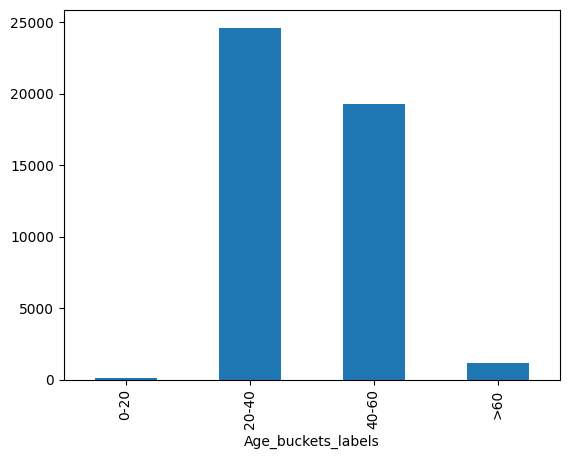

In [15]:
df.groupby('Age_buckets_labels')['age'].count().plot.bar()

First Insight- Maximum number of rows in the Dataset comes between 20-40 age 

In [16]:
df.groupby('loan')['Age_buckets_labels'].count()

loan
0    37967
1     7244
Name: Age_buckets_labels, dtype: int64

<AxesSubplot: xlabel='loan'>

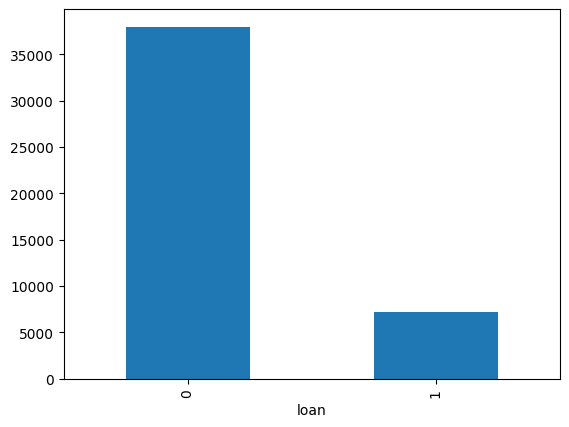

In [17]:
df.groupby('loan')['Age_buckets_labels'].count().plot.bar()

In [18]:
df.groupby('Age_buckets_labels')['housing'].count()

Age_buckets_labels
0-20        97
20-40    24620
40-60    19306
>60       1188
Name: housing, dtype: int64

<AxesSubplot: xlabel='Age_buckets_labels'>

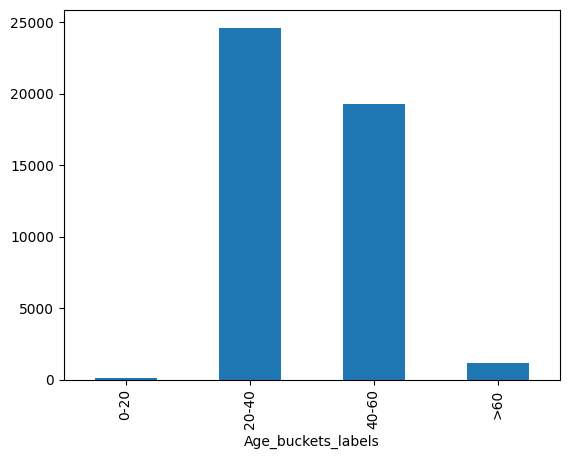

In [19]:
df.groupby('Age_buckets_labels')['housing'].count().plot.bar()

In [20]:
df.groupby('job')['housing'].count()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: housing, dtype: int64

<AxesSubplot: xlabel='job'>

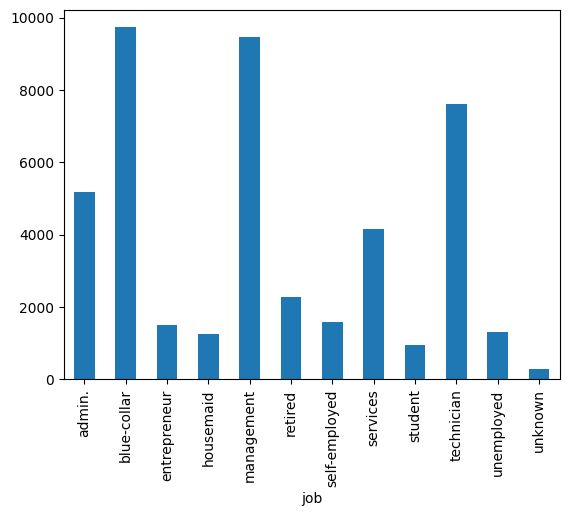

In [21]:
df.groupby('job')['housing'].count().plot.bar()

In [22]:
df.groupby('job')['balance'].mean()

job
admin.           1135.838909
blue-collar      1078.826654
entrepreneur     1521.470074
housemaid        1392.395161
management       1763.616832
retired          1984.215106
self-employed    1647.970868
services          997.088108
student          1388.060768
technician       1252.632092
unemployed       1521.745971
unknown          1772.357639
Name: balance, dtype: float64

<AxesSubplot: xlabel='job'>

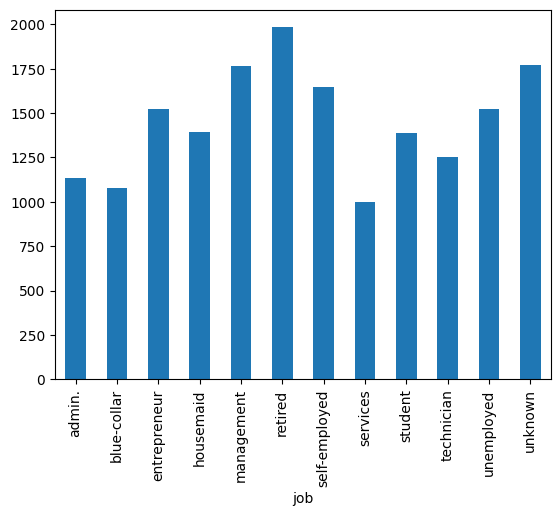

In [23]:
df.groupby('job')['balance'].mean().plot.bar()

<AxesSubplot: >

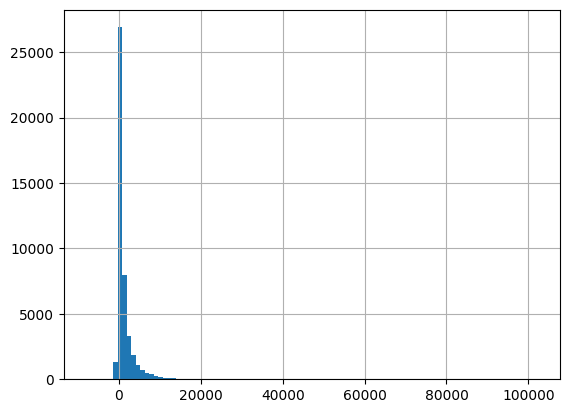

In [24]:
df['balance'].hist(bins=100)

<AxesSubplot: >

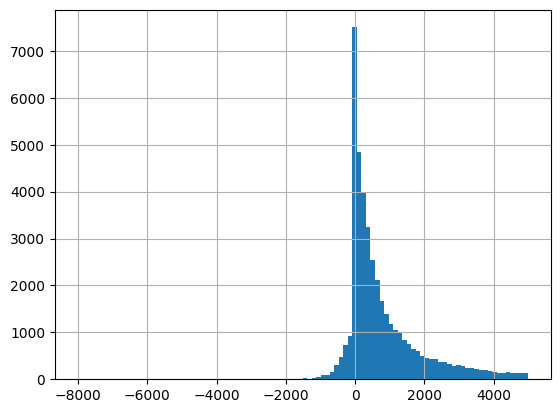

In [25]:
# and now let's look at the lower balance in more detail

df[df['balance']<5000]['balance'].hist(bins=100)

<AxesSubplot: >

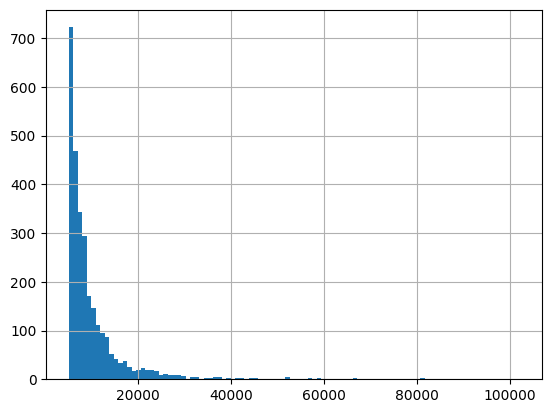

In [26]:
df[df['balance']>5000]['balance'].hist(bins=100)

In [27]:
# and now let's divide into arbitrary buckets, assuming that these make business sense

# bucket interval
buckets = [-10000,0, 5000, 10000, 15000, 20000,150000]

# bucket labels
labels = ['<0','0-5k', '5-10k', '10-15k', '15-20k', '>20k']

# discretisation
df['balance_buckets'] = pd.cut(
    df['balance'], bins=buckets, labels=labels, include_lowest=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets,balance_buckets
0,58,management,0,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
1,44,technician,1,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
2,33,entrepreneur,0,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,NaN,no,20-40,"(20.0, 40.0]",0-5k
3,47,blue-collar,0,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no,40-60,"(40.0, 60.0]",0-5k
4,33,unknown,1,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no,20-40,"(20.0, 40.0]",0-5k


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '<0'),
  Text(1, 0, '0-5k'),
  Text(2, 0, '5-10k'),
  Text(3, 0, '10-15k'),
  Text(4, 0, '15-20k'),
  Text(5, 0, '>20k')])

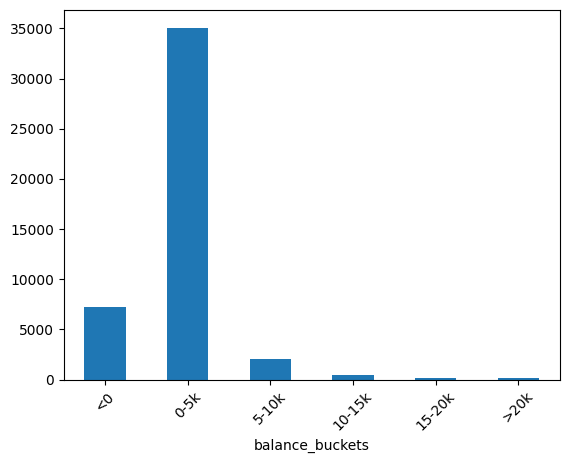

In [28]:
df.groupby(['balance_buckets'])['balance'].count().plot.bar()
plt.xticks(rotation=45)

In [29]:
df.groupby(['balance_buckets'])['balance'].count()

balance_buckets
<0         7280
0-5k      35086
5-10k      2016
10-15k      478
15-20k      158
>20k        193
Name: balance, dtype: int64

In [30]:
df.groupby(['balance_buckets'])['default'].count()

balance_buckets
<0         7280
0-5k      35086
5-10k      2016
10-15k      478
15-20k      158
>20k        193
Name: default, dtype: int64

In [31]:
df.groupby(['marital']).count()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age_buckets_labels,Age_buckets,balance_buckets
marital,,,,,,,,,,,,,,,,,,,
0,27214,27214,27214,27214,27214,27214,27214,27204,27214,27214,27214,27214,27214,27214,27209,27214,27214,27214,27214
1,12790,12790,12790,12790,12790,12790,12790,12787,12790,12790,12790,12790,12790,12790,12786,12790,12790,12790,12790
2,5207,5207,5207,5207,5207,5207,5207,5206,5207,5207,5207,5207,5207,5207,5206,5207,5207,5207,5207


<AxesSubplot: xlabel='marital'>

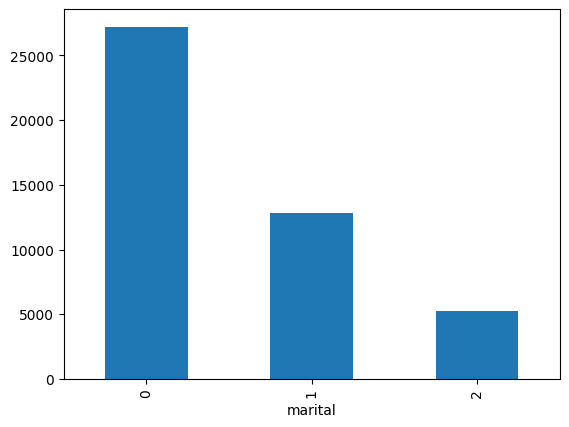

In [32]:
df.groupby(['marital'])['balance'].count().plot.bar()

## Plot pie chart  for SubScribe / NOT

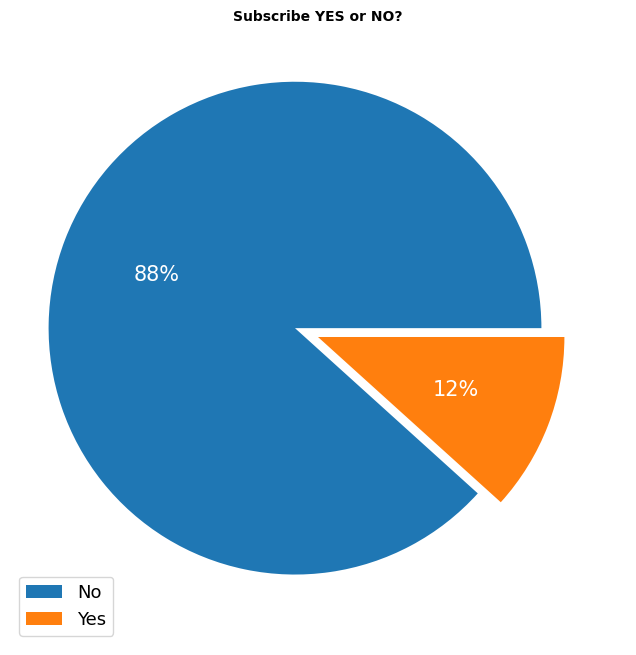

In [33]:
plt.figure(figsize=(8,8))
plt.title("Subscribe YES or NO?", size=10, fontweight='bold')
plt.pie(df['Target'].value_counts(), autopct='%.0f%%',
        textprops={'fontsize': 15, 'color': 'white'}, explode=(0.1, 0))
plt.legend(['No', 'Yes'], loc='lower left', fontsize=13)
plt.show()

<AxesSubplot: xlabel='balance', ylabel='Target'>

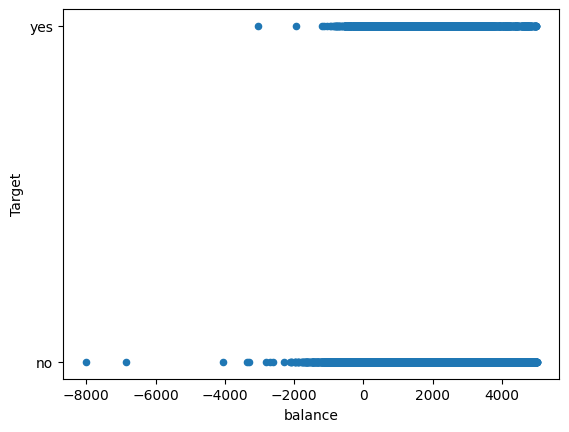

In [34]:


df[df['balance'] < 5000].plot.scatter(x='balance', y='Target')

In [35]:
df['Target'] = np.where(df['Target'] =='yes', 1, 0)
df.describe()


,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.513238,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.692948,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


#Numerical Figures Correlation

In [36]:
df[['age','balance','day','duration','pdays','previous']].corr()

,age,balance,day,duration,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.001565,0.001203
pdays,-0.023758,0.003435,-0.093044,-0.001565,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,0.454820,1.000000


<AxesSubplot: >

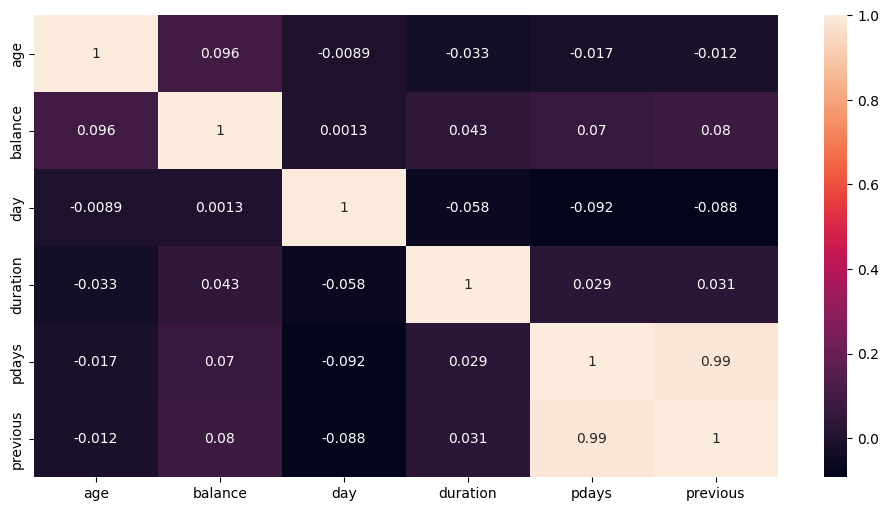

In [37]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[['age','balance','day','duration','pdays','previous']].corr('spearman'), annot=True)

Categorical Figures Correlation

In [38]:
df_unchanged[['job','marital','education','default','housing','loan','Target']].corr()

C:\Users\insre\AppData\Local\Temp\ipykernel_18004\3231632338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_unchanged[['job','marital','education','default','housing','loan','Target']].corr()


,marital,default,housing,loan,Target
marital,1.000000,0.018404,-0.011671,-0.018526,0.043846
default,0.018404,1.000000,-0.006025,0.077234,-0.022419
housing,-0.011671,-0.006025,1.000000,0.041323,-0.139173
loan,-0.018526,0.077234,0.041323,1.000000,-0.068185
Target,0.043846,-0.022419,-0.139173,-0.068185,1.000000


C:\Users\insre\AppData\Local\Temp\ipykernel_18004\4095890657.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_unchanged[['job','marital','education','default','housing','loan','Target']].corr('spearman'), annot=True)


<AxesSubplot: >

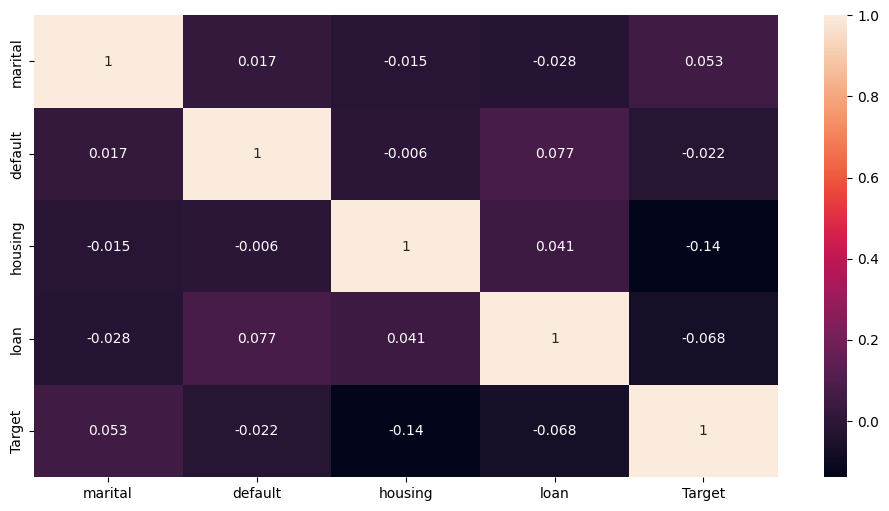

In [39]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_unchanged[['job','marital','education','default','housing','loan','Target']].corr('spearman'), annot=True)

<AxesSubplot: xlabel='Target', ylabel='count'>

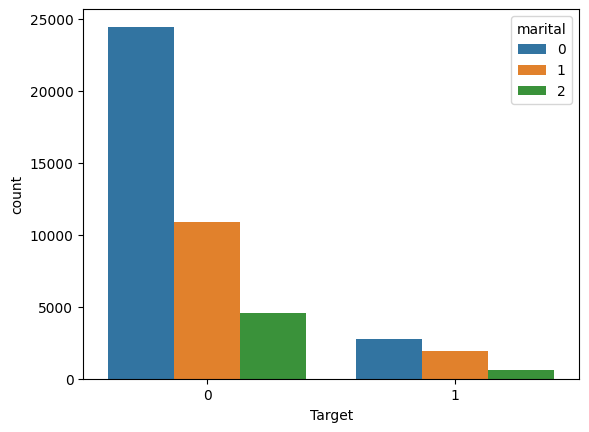

In [40]:
sns.countplot(data= df, x='Target', hue='marital')

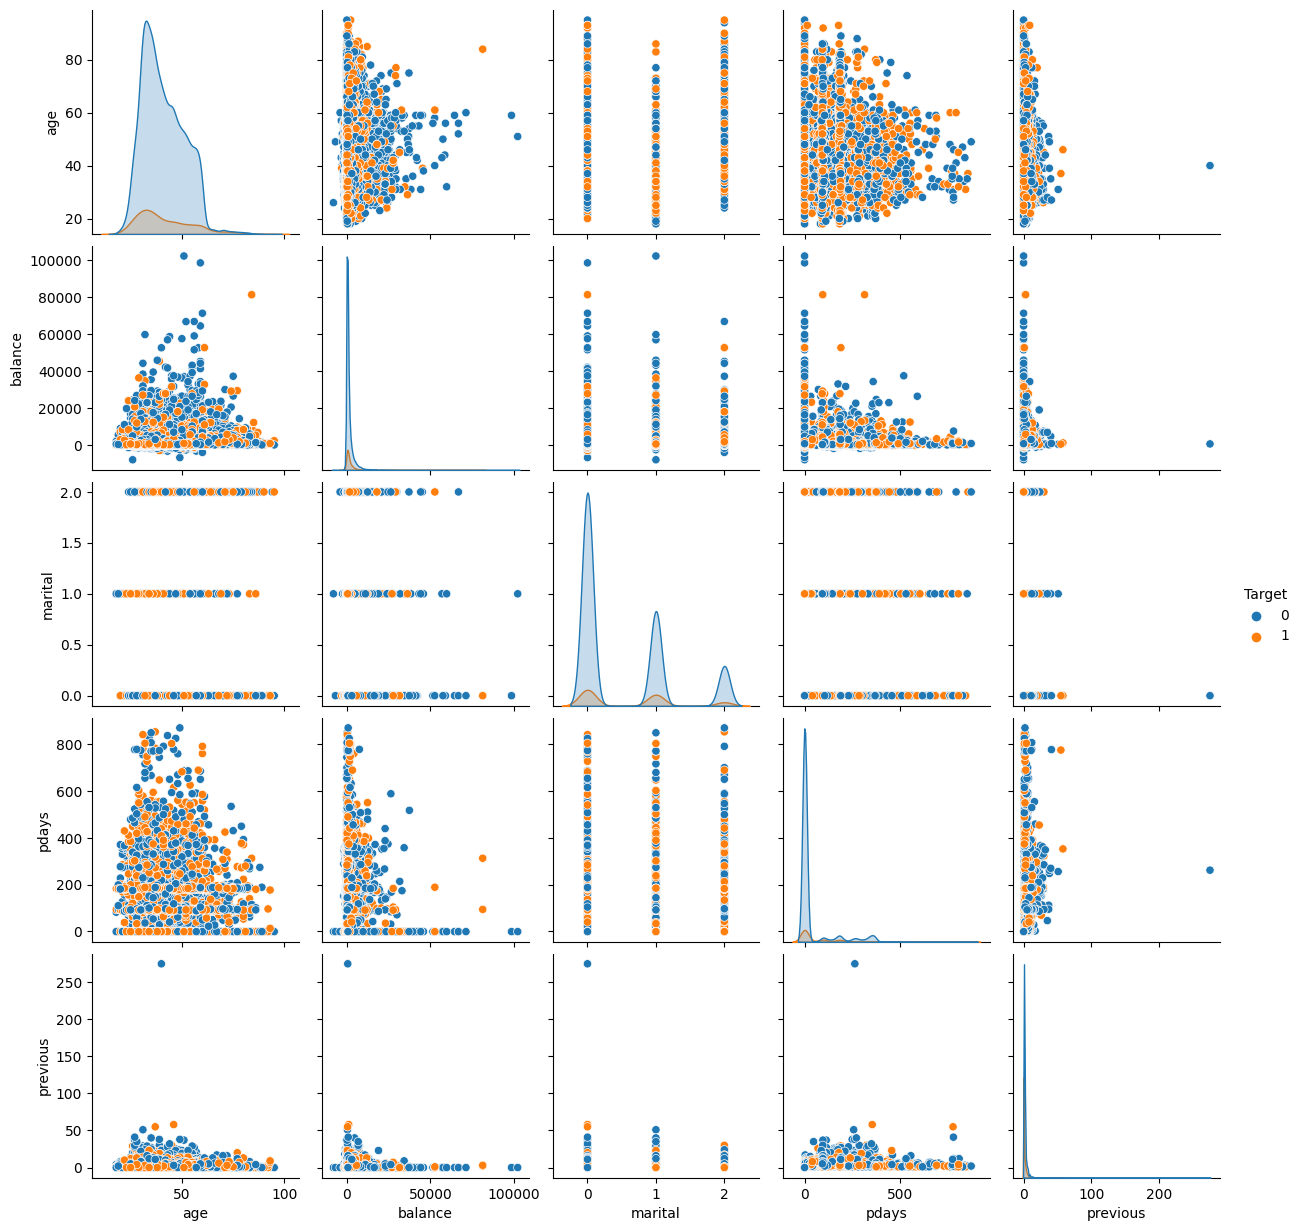

In [41]:
sns.pairplot(data= df[['age','balance','marital','pdays', 'previous','Target']], hue='Target')

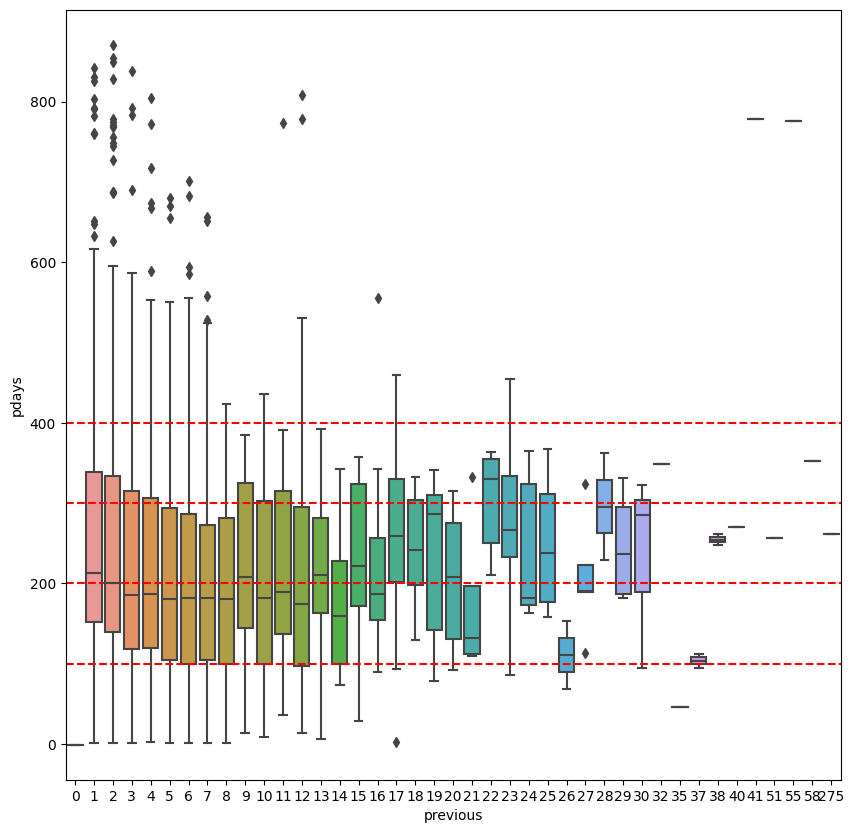

In [42]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df['pdays'],
            x=df['previous'])
reference = [100, 200, 300, 400]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

### MAnual Encoding ####

In [43]:
df = df.drop(columns=['Age_buckets_labels', 'Age_buckets','balance_buckets'], axis=1)
df.shape
df1=df.fillna(method='pad')


In [44]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [45]:
df1['job'] = df1['job'].replace({'management' :1, 'technician' :2, 'entrepreneur':3,
                             'blue-collar' :4, 'retired' :5, 'admin.':6,
                             'services' :7, 'self-employed' :8, 'unemployed' :9,
                             'housemaid':10, 'student':11, 'unknown':-1
                             })

In [46]:
df1['education'] = df1['education'].replace({'tertiary' :1, 'secondary' :2, 'primary':3,
                       'unknown':-1})

In [47]:
df1['contact'] = df1['contact'].replace({'cellular' :1, 'telephone' :2,
                       'unknown':-1})

In [48]:
df1['month'] = df1['month'].replace({'jan' :1, 'feb' :2, 'mar':3,
                             'apr' :4, 'may' :5, 'jun':6,
                             'jul' :7, 'aug' :8, 'sep' :9,
                             'oct':10, 'nov':11, 'dec':12
                             })

In [49]:
df1['poutcome'] = df1['poutcome'].replace({'failure' :1, 'other' :2,'success' :3,
                       'unknown':-1})

In [1]:
df1['pdays'].unique()

NameError: name 'df1' is not defined

In [50]:
def counts_plot(y_var, col="w", ax=None):
    y_var_counts = (
        df1.loc[:, y_var]
        .value_counts()
        .reset_index()
        .rename(columns={"index": y_var, y_var: "counts"})
        .assign(
            percent=lambda df_: (df_["counts"] / df_["counts"].sum()).round(2) * 100
        )
    )
    sns.set_context("paper")
    ax0 = sns.barplot(
        data=y_var_counts,
        x="percent",
        y=y_var,
        color=col,
        ax=ax,
        order=y_var_counts[y_var],
    )
    values1 = ax0.containers[0].datavalues
    labels = ["{:g}%".format(val) for val in values1]
    ax0.bar_label(ax0.containers[0], labels=labels, fontsize=9, color="#740405")
    ax0.set_ylabel("")
    ax0.set_xlabel("Percent", fontsize=10)
    ax0.set_title(str.title(y_var) + " | proportions ", fontsize=10)
    return

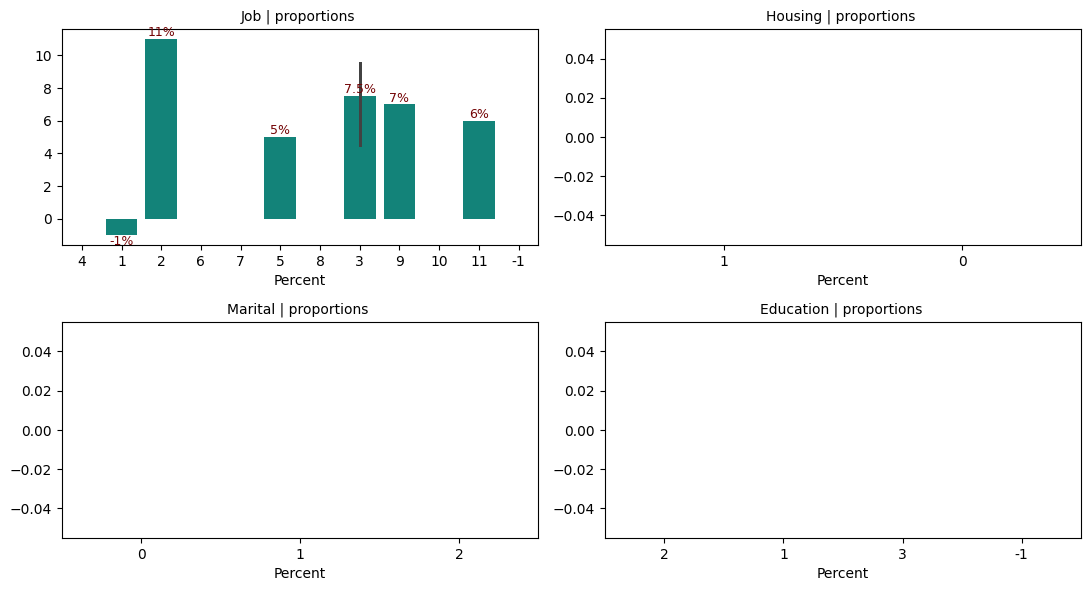

In [51]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(11, 6))
counts_plot("job", ax=ax1, col="#009688")
counts_plot("housing", ax=ax2, col="#35a79c")
counts_plot("marital", ax=ax3, col="#54b2a9")
counts_plot("education", ax=ax4, col="#83d0c9")
fig.tight_layout()
plt.show()

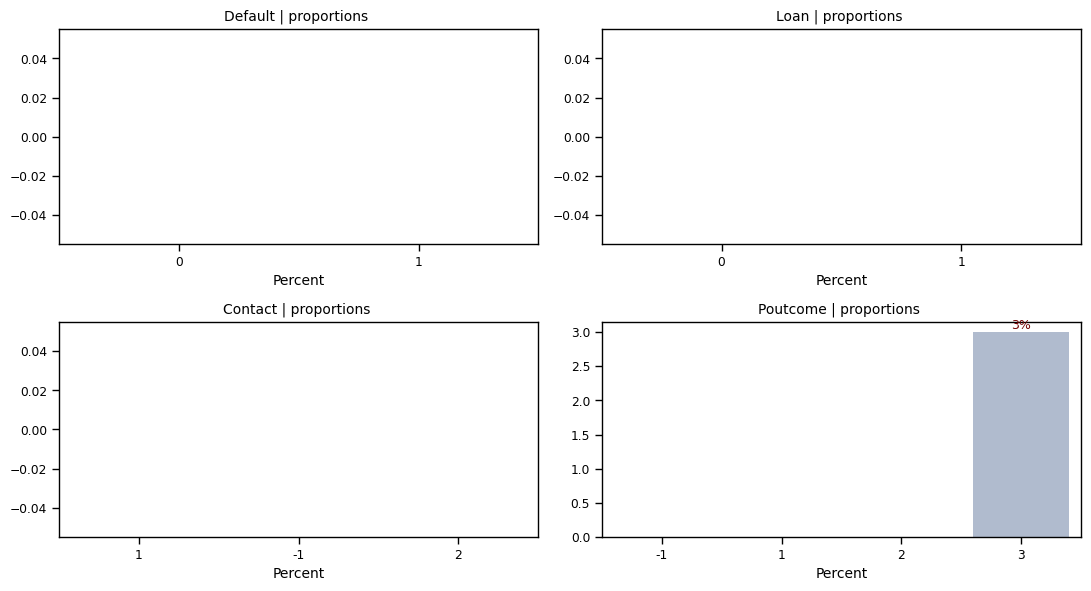

In [52]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(11, 6))
counts_plot("default", ax=ax1, col="#2e5090")
counts_plot("loan", ax=ax2, col="#5873a6")
counts_plot("contact", ax=ax3, col="#8296bc")
counts_plot("poutcome", ax=ax4, col="#abb9d3")
fig.tight_layout()
plt.show()

**Balancing DataSet via Under Sampling**

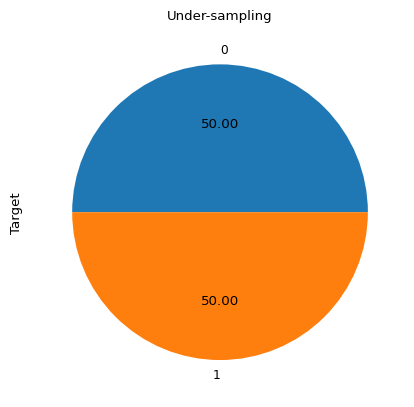

In [53]:
from imblearn.under_sampling import RandomUnderSampler
X = df.drop(['Target'], axis=1)
y = df['Target']
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [54]:
y_res.value_counts()


0    5289
1    5289
Name: Target, dtype: int64

***Over Sampling**

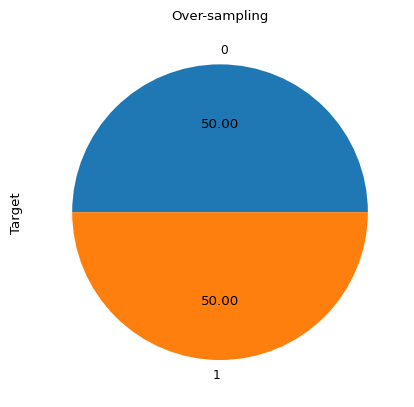

In [55]:

from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")
     

In [56]:
y_res.value_counts()

0    39922
1    39922
Name: Target, dtype: int64

In [57]:
df.dtypes 

age           int64
job          object
marital       int32
education    object
default       int64
balance       int64
housing       int32
loan          int32
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target        int32
dtype: object

In [58]:
df1.dtypes

age          int64
job          int64
marital      int32
education    int64
default      int64
balance      int64
housing      int32
loan         int32
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
Target       int32
dtype: object

In [59]:
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [60]:
df1['job'].unique()



array([ 1,  2,  3,  4, -1,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [61]:
df1['job'].unique()

array([ 1,  2,  3,  4, -1,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [62]:
df1['education'].unique()

array([ 1,  2, -1,  3], dtype=int64)

In [63]:
df1['education'].unique()

array([ 1,  2, -1,  3], dtype=int64)

In [64]:
df1['contact'].unique()

array([-1,  1,  2], dtype=int64)

In [65]:
df1['contact'].unique()

array([-1,  1,  2], dtype=int64)

In [66]:
df1['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [67]:
df1['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [68]:
df1['poutcome'].unique()

array([-1,  1,  2,  3], dtype=int64)

In [69]:
df1['poutcome'].unique()

array([-1,  1,  2,  3], dtype=int64)

In [70]:
from imblearn.under_sampling import RandomUnderSampler
X = df1.drop(['Target'], axis=1)
y = df1['Target']

In [71]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**SMOTE**

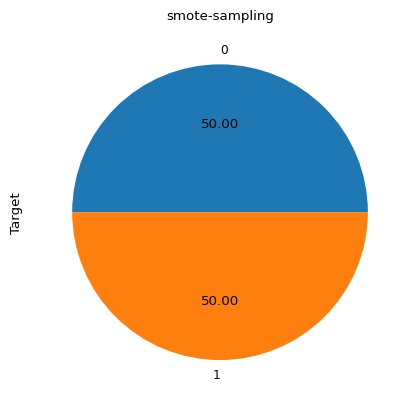

In [72]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X, y)

ax = y_sm.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("smote-sampling")

In [73]:
y_sm.value_counts()

0    39922
1    39922
Name: Target, dtype: int64

***ADASYN***

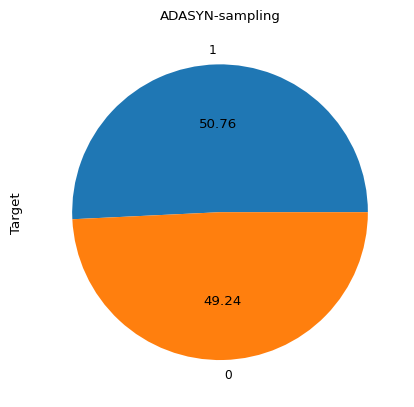

In [74]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_resample(X, y)
ax = y_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("ADASYN-sampling")

In [75]:
y_resampled.value_counts()

1    41155
0    39922
Name: Target, dtype: int64

**DBSMOTE**

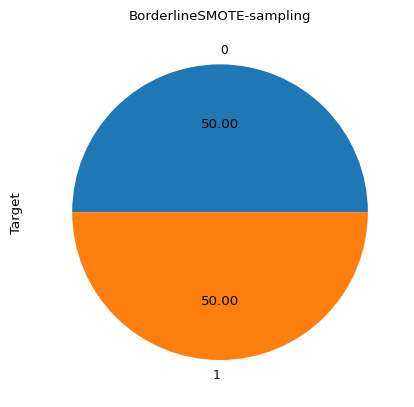

In [76]:
from imblearn.over_sampling import BorderlineSMOTE

X_smbd, y_smbd = BorderlineSMOTE().fit_resample(X, y)
ax = y_smbd.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("BorderlineSMOTE-sampling")

In [77]:
y_smbd.value_counts()

0    39922
1    39922
Name: Target, dtype: int64

In [78]:
X_smbd.value_counts()

age  job  marital  education  default  balance  housing  loan  contact  day  month  duration  campaign  pdays  previous  poutcome
36   0    0        1          0        0        0        0      1       9    8      260       2          96    2          3          6
61   8    2        1          0        6        1        0      1       13   10     210       1          182   2          3          4
36   5    0        1          0        375      1        0      0       15   5      828       2         -1     0         -1          4
54   4    1        1          0        0        0        0     -1       12   5      616       1         -1     0         -1          4
39   1    2        1          0        2        0        0      1       6    5      488       1         -1     0         -1          4
                                                                                                                                    ..
35   1    0        1          0        71       1        0  

In [79]:
# get a list of models to evaluate
from numpy import mean
from numpy import isnan
from numpy import asarray
from numpy import polyfit
from scipy.stats import pearsonr
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
 
from xgboost import XGBClassifier

def get_models():
 models = list()
 models.append(LogisticRegression())
 models.append(RidgeClassifier())
 models.append(SGDClassifier())
 models.append(PassiveAggressiveClassifier())
 models.append(KNeighborsClassifier())
 models.append(DecisionTreeClassifier())
 models.append(ExtraTreeClassifier())
 models.append(LinearSVC())
 models.append(SVC())
 models.append(GaussianNB())
 models.append(AdaBoostClassifier())
 models.append(BaggingClassifier())
 models.append(RandomForestClassifier())
 models.append(ExtraTreesClassifier())
 models.append(GaussianProcessClassifier())
 models.append(GradientBoostingClassifier())
 models.append(LinearDiscriminantAnalysis())
 models.append(QuadraticDiscriminantAnalysis())
 models.append(XGBClassifier())
 return models
 

### Scaling ###

In [80]:

X = df1.drop(['Target'], axis=1)
y = df1['Target']
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 0)

### MinMax Scaling ####

In [81]:
# define the pipeline
from numpy import mean, std
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


trans = MinMaxScaler()
min_max = MinMaxScaler(feature_range= (0,1))
X_train2 = min_max.fit_transform(X_train1)
X_train2 = pd.DataFrame(X_train2)
X_train2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000,55890.000000
mean,0.298064,0.414819,0.214081,0.639202,0.011040,0.089772,0.388567,0.096547,0.541671,0.476150,0.456689,0.096754,0.023731,0.060402,0.002763,0.179017
std,0.142010,0.215149,0.311744,0.200149,0.104489,0.029883,0.487429,0.295342,0.272055,0.260488,0.213188,0.088625,0.045489,0.123644,0.008524,0.317982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.250000,0.000000,0.500000,0.000000,0.076515,0.000000,0.000000,0.666667,0.266667,0.363636,0.037104,0.000000,0.000000,0.000000,0.000000
50%,0.272727,0.416667,0.000000,0.750000,0.000000,0.080537,0.000000,0.000000,0.666667,0.466667,0.454545,0.066478,0.017544,0.000000,0.000000,0.000000
75%,0.389610,0.583333,0.500000,0.750000,0.000000,0.091482,1.000000,0.000000,0.666667,0.666667,0.545455,0.129606,0.035088,0.057053,0.003636,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Standard Scaling ###

In [82]:
object= StandardScaler()
 
# Splitting the independent and dependent variables

 
# standardization 
X_train3 = object.fit_transform(X_train1) 
X_train3 = pd.DataFrame(X_train3)
X_train3.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04,5.589000e+04
mean,2.514042e-16,1.234455e-16,5.059868e-17,5.415838e-17,5.021728e-17,2.084971e-17,1.779853e-18,6.032430e-17,-1.000532e-16,1.779853e-17,8.390735e-18,4.551338e-17,1.291665e-16,-1.322176e-17,-4.195368e-18,-4.525912e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-2.098916e+00,-1.928073e+00,-6.867284e-01,-3.193666e+00,-1.056540e-01,-3.004155e+00,-7.971836e-01,-3.269009e-01,-1.991054e+00,-1.827932e+00,-2.142209e+00,-1.091728e+00,-5.216916e-01,-4.885178e-01,-3.240993e-01,-5.629829e-01
25%,-7.271294e-01,-7.660771e-01,-6.867284e-01,-6.954995e-01,-1.056540e-01,-4.436153e-01,-7.971836e-01,-3.269009e-01,4.594539e-01,-8.042033e-01,-4.364867e-01,-6.730649e-01,-5.216916e-01,-4.885178e-01,-3.240993e-01,-5.629829e-01
50%,-1.784148e-01,8.586584e-03,-6.867284e-01,5.535836e-01,-1.056540e-01,-3.090486e-01,-7.971836e-01,-3.269009e-01,4.594539e-01,-3.640702e-02,-1.005610e-02,-3.416235e-01,-1.360125e-01,-4.885178e-01,-3.240993e-01,-5.629829e-01
75%,6.446569e-01,7.832503e-01,9.171684e-01,5.535836e-01,-1.056540e-01,5.723693e-02,1.254416e+00,-3.269009e-01,4.594539e-01,7.313893e-01,4.163745e-01,3.706848e-01,2.496667e-01,-2.708597e-02,1.024918e-01,2.232322e-01
max,4.942921e+00,2.719909e+00,2.521065e+00,1.802667e+00,9.464854e+00,3.046019e+01,1.254416e+00,3.059031e+00,1.684708e+00,2.011050e+00,2.548528e+00,1.019182e+01,2.146202e+01,7.599292e+00,1.169884e+02,2.581877e+00


### Accuracy -> not Scaled vs MinMax Scaled vs Standard Scaled

In [83]:
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy Not Scaled: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy Not Scaled: 0.882 (0.003)


In [84]:

# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy after Max Scaled: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy after Max Scaled: 0.891 (0.003)


In [94]:
# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy after Standard Scaled: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy after Standard Scaled: 0.893 (0.003)


In [86]:
# split into 70:30 ration
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 0)

In [87]:
#K-fold cross validation

from sklearn.model_selection import KFold
kfold_val = KFold(10)

In [88]:
for train_index,test_index in kfold_val.split(X_sm, y_sm):
    print('TRaining Index -',train_index)
    print('Validation Index -',test_index)  

TRaining Index - [ 7985  7986  7987 ... 79841 79842 79843]
Validation Index - [   0    1    2 ... 7982 7983 7984]
TRaining Index - [    0     1     2 ... 79841 79842 79843]
Validation Index - [ 7985  7986  7987 ... 15967 15968 15969]
TRaining Index - [    0     1     2 ... 79841 79842 79843]
Validation Index - [15970 15971 15972 ... 23952 23953 23954]
TRaining Index - [    0     1     2 ... 79841 79842 79843]
Validation Index - [23955 23956 23957 ... 31937 31938 31939]
TRaining Index - [    0     1     2 ... 79841 79842 79843]
Validation Index - [31940 31941 31942 ... 39921 39922 39923]
TRaining Index - [    0     1     2 ... 79841 79842 79843]
Validation Index - [39924 39925 39926 ... 47905 47906 47907]
TRaining Index - [    0     1     2 ... 79841 79842 79843]
Validation Index - [47908 47909 47910 ... 55889 55890 55891]
TRaining Index - [    0     1     2 ... 79841 79842 79843]
Validation Index - [55892 55893 55894 ... 63873 63874 63875]
TRaining Index - [    0     1     2 ... 79841 

In [89]:
# evaluate the model using a given test condition
def evaluate_model(cv, model):
 # get the dataset
 X, y = X,y
 # evaluate the model
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 # return scores
 return mean(scores)

def validate_model(model_name):
   # define test conditions
   ideal_cv = LeaveOneOut()
   cv = KFold(n_splits=10, shuffle=True, random_state=1)
   # get the list of models to consider
   # collect results
   ideal_results, cv_results = list(), list()
   model = model_name 
   # evaluate each model
  
   # evaluate model using each test condition
   cv_mean = evaluate_model(cv, model)
   ideal_mean = evaluate_model(ideal_cv, model)
   # # check for invalid results
   # if isnan(cv_mean) or isnan(ideal_mean):
   #    continue
   # store results
   cv_results.append(cv_mean)
   ideal_results.append(ideal_mean)
   # summarize progress
   print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))
   # calculate the correlation between each test condition
   corr, _ = pearsonr(cv_results, ideal_results)
   print('Correlation: %.3f' % corr)
   # scatter plot of results
   pyplot.scatter(cv_results, ideal_results)
   # plot the line of best fit
   coeff, bias = polyfit(cv_results, ideal_results, 1)
   line = coeff * asarray(cv_results) + bias
   pyplot.plot(cv_results, line, color='r')
   # label the plot
   pyplot.title('10-fold CV vs LOOCV Mean Accuracy')
   pyplot.xlabel('Mean Accuracy (10-fold CV)')
   pyplot.ylabel('Mean Accuracy (LOOCV)')
   # show the plot
   pyplot.show()

### XGBoost- Modelling ###

In [115]:
from xgboost import XGBClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
  


#X_train1, X_test1, y_train1, y_test1
model = XGBClassifier()
model.fit(X_train1, y_train1)
# # make predictions for test data
# y_pred = model.predict(X_test1)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

# predict the target on the train dataset
### Cross Validation


predict_train = model.predict(X_train1)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train1,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test1)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test1,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data [0 1 1 ... 1 0 1]
accuracy_score on train dataset :  0.9555734478439792
Target on test data [1 1 1 ... 1 1 1]
accuracy_score on test dataset :  0.926233614427653


### NAIVE BAYES 

In [116]:
from sklearn.naive_bayes import GaussianNB

#X_train1, X_test1, y_train1, y_test1
model = GaussianNB()

# fit the model with the training data
model.fit(X_train1, y_train1)

# predict the target on the train dataset
predict_train = model.predict(X_train1)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train1,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test1)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test1,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data [0 1 1 ... 1 1 1]
accuracy_score on train dataset :  0.798622293791376
Target on test data [1 1 1 ... 1 1 1]
accuracy_score on test dataset :  0.7989062369541622


### RANDOMForest

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=20)
# Fit the training data
classifier_rf.fit(X_train1, y_train1)
# Predict on testing data 
y_pred = classifier_rf.predict(X_test1)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))

# predict the target on the train dataset
predict_train = classifier_rf.predict(X_train1)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train1,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = classifier_rf.predict(X_test1)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test1,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

[[10782  1007]
 [  723 11442]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     11789
           1       0.92      0.94      0.93     12165

    accuracy                           0.93     23954
   macro avg       0.93      0.93      0.93     23954
weighted avg       0.93      0.93      0.93     23954

Target on train data [0 1 1 ... 1 0 1]
accuracy_score on train dataset :  0.9990874932903918
Target on test data [1 1 1 ... 1 1 1]
accuracy_score on test dataset :  0.9277782416297904


### ADABoost

In [ ]:
#X_train1, X_test1, y_train1, y_test1
# Create adaboost classifer object
from sklearn.ensemble import AdaBoostClassifier

classifier_ab = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Fit the training data
classifier_ab.fit(X_train1, y_train1)
# Predict on testing data 
y_pred = classifier_ab.predict(X_test1)



from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test1, y_pred))
print(classification_report(y_test1, y_pred))

# predict the target on the train dataset
predict_train = classifier_ab.predict(X_train1)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train1,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = classifier_ab.predict(X_test1)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test1,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

[[10357  1432]
 [ 1219 10946]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     11789
           1       0.88      0.90      0.89     12165

    accuracy                           0.89     23954
   macro avg       0.89      0.89      0.89     23954
weighted avg       0.89      0.89      0.89     23954

Target on train data [0 1 1 ... 1 1 1]
accuracy_score on train dataset :  0.8927894077652532
Target on test data [1 1 1 ... 1 1 1]
accuracy_score on test dataset :  0.88932954830091


### SVM

In [118]:
#X_train1, X_test1, y_train1, y_test1
# Create adaboost classifer object
from sklearn.svm import SVC
# Fit the training data
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc = clf.fit(X_train1, y_train1)
# Predict on testing data 
y_pred = svc.predict(X_test1)
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# print(confusion_matrix(y_test1, y_pred))
# print(classification_report(y_test1, y_pred))

# predict the target on the train dataset
predict_train = clf.predict(X_train1)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train1,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = clf.predict(X_test1)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test1,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data [0 1 1 ... 1 1 1]
accuracy_score on train dataset :  0.9098586509214529
Target on test data [1 1 1 ... 1 1 1]
accuracy_score on test dataset :  0.9009768723386491
